In [8]:
import pandas as pd

data = pd.read_csv('data/student_info_cleaned.csv')
data.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,score,grade,studied_credits_binned
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,82.4,A-,201+
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,65.4,C,30-60
2,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,76.3,B,30-60
3,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,55.0,D,30-60
4,AAA,2013J,38053,M,Wales,A Level or Equivalent,80-90%,35-55,0,60,N,Pass,66.9,C,30-60


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23731 entries, 0 to 23730
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   code_module             23731 non-null  object 
 1   code_presentation       23731 non-null  object 
 2   id_student              23731 non-null  int64  
 3   gender                  23731 non-null  object 
 4   region                  23731 non-null  object 
 5   highest_education       23731 non-null  object 
 6   imd_band                22740 non-null  object 
 7   age_band                23731 non-null  object 
 8   num_of_prev_attempts    23731 non-null  int64  
 9   studied_credits         23731 non-null  int64  
 10  disability              23731 non-null  object 
 11  final_result            23731 non-null  object 
 12  score                   23731 non-null  float64
 13  grade                   23731 non-null  object 
 14  studied_credits_binned  23731 non-null

In [10]:
data['final_result'].value_counts()
#drop withdrawn students
data = data[data['final_result'] != 'Withdrawn']

In [11]:
import numpy as np
#order highest_education, imd_band, age_band, disability, studied_credits_binned, final_result
highest_education = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
}

imd_band = {
    np.nan: -1,
    '0-10%': 0,
    '10-20': 1,
    '20-30%': 2,
    '30-40%': 3,
    '40-50%': 4,
    '50-60%': 5,
    '60-70%': 6,
    '70-80%': 7,
    '80-90%': 8,
    '90-100%': 9
}

age_band = {
    '0-35': 0,
    '35-55': 1,
    '55<=': 2
}

disability = {
    'N': 0,
    'Y': 1
}

studied_credits_binned = {
    '30-60': 0,
    '61-100': 1,
    '101-200': 2,
    '201+': 3
}

final_result = {
    'Fail': 0,
    'Pass': 1,
    'Distinction': 1,
    'Withdrawn': 0
}

data_dummies = pd.get_dummies(data, columns=['code_module', 'code_presentation', 'gender', 'region'])
data_dummies['highest_education'] = data_dummies['highest_education'].map(highest_education)
data_dummies['imd_band'] = data_dummies['imd_band'].map(imd_band)
data_dummies['age_band'] = data_dummies['age_band'].map(age_band)
data_dummies['disability'] = data_dummies['disability'].map(disability)
data_dummies['studied_credits_binned'] = data_dummies['studied_credits_binned'].map(studied_credits_binned)
data_dummies['final_result'] = data_dummies['final_result'].map(final_result)

from sklearn.preprocessing import LabelEncoder
data_ordinal = data.copy()
data_ordinal['highest_education'] = data_dummies['highest_education']
data_ordinal['imd_band'] = data_dummies['imd_band']
data_ordinal['age_band'] = data_dummies['age_band']
data_ordinal['disability'] = data_dummies['disability']
data_ordinal['studied_credits_binned'] = data_dummies['studied_credits_binned']
data_ordinal['final_result'] = data_dummies['final_result']

le = LabelEncoder()
data_ordinal['code_module'] = le.fit_transform(data_ordinal['code_module'])
data_ordinal['code_presentation'] = le.fit_transform(data_ordinal['code_presentation'])
data_ordinal['gender'] = le.fit_transform(data_ordinal['gender'])
data_ordinal['region'] = le.fit_transform(data_ordinal['region'])


In [12]:
data_dummies['final_result'].value_counts()

1    13868
0     5279
Name: final_result, dtype: int64

model building

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE#pip install imbalanced-learn



X_dummy = data_dummies.drop(['final_result', 'studied_credits', 'id_student', 'score', 'grade'], axis=1)
y_dummy = data_dummies['final_result']

X_ord = data_ordinal.drop(['final_result', 'studied_credits', 'id_student', 'score', 'grade'], axis=1)
y_ord = data_ordinal['final_result']

smote = SMOTE(sampling_strategy='minority', random_state=42)
X_dummy_smote, y_dummy_smote = smote.fit_resample(X_dummy, y_dummy)
X_ord_smote, y_ord_smote = smote.fit_resample(X_ord, y_ord)



In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_dummy_smote = pd.read_csv('data/X_dummy_smote.csv')
y_dummy_smote = pd.read_csv('data/y_dummy_smote.csv')
X_ord_smote = pd.read_csv('data/X_ord_smote.csv')
y_ord_smote = pd.read_csv('data/y_ord_smote.csv')

In [30]:
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy_smote, y_dummy_smote, test_size=0.2, random_state=42)
X_train_ord, X_test_ord, y_train_ord, y_test_ord = train_test_split(X_ord_smote, y_ord_smote, test_size=0.2, random_state=42)

logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train_dummy, y_train_dummy)

y_pred = logreg.predict(X_test_dummy)
acc = accuracy_score(y_test_dummy, y_pred)
print('Accuracy Logistic Regression:', acc)

Accuracy Logistic Regression: 0.7339581831290555


xgboost

In [17]:
#XGBoost
from xgboost import XGBClassifier #pip install xgboost
xgb = XGBClassifier()
xgb.fit(X_train_dummy, y_train_dummy)

y_pred = xgb.predict(X_test_dummy)
acc = accuracy_score(y_test_dummy, y_pred)
print('Accuracy XGBoost:', acc)

Accuracy XGBoost: 0.7519826964671954


random forest

In [18]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_dummy, y_train_dummy)

y_pred = rf.predict(X_test_dummy)
acc = accuracy_score(y_test_dummy, y_pred)
print('Accuracy Random Forest:', acc)

Accuracy Random Forest: 0.7543258832011536


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
categories = ['code_module', 'code_presentation', 'gender', 'region']
numerical_features = [col for col in X_train_ord.columns if col not in categories]

# X_train_ord[numerical_features] = scaler.fit_transform(X_train_ord[numerical_features])
# X_test_ord[numerical_features] = scaler.transform(X_test_ord[numerical_features])


num_categories = []
for category in categories:
    num_categories.append(data_ordinal[category].nunique())

X_train_ord_num = X_train_ord.drop(categories, axis=1)
X_test_ord_num = X_test_ord.drop(categories, axis=1)
X_train_ord_cat = X_train_ord[categories]
X_test_ord_cat = X_test_ord[categories]

In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, BatchNormalization


# X_train_dummy = X_train_dummy.astype('float32')
# y_train_dummy = y_train_dummy.astype('float32')
# X_test_dummy = X_test_dummy.astype('float32')
# y_test_dummy = y_test_dummy.astype('float32')

X_train_ord_num = X_train_ord_num.astype('float32')
X_train_ord_cat = X_train_ord_cat.astype('float32')
y_train_ord = y_train_ord.astype('float32')
X_test_ord_num = X_test_ord_num.astype('float32')
X_test_ord_cat = X_test_ord_cat.astype('float32')
y_test_ord = y_test_ord.astype('float32')

embedding_inputs = []
embeddings = []
for i in range(len(num_categories)):
    input_i = Input(shape=(1,))
    embedding_size = min(np.ceil((num_categories[i])/2), 50 )  # embedding size rule of thumb
    embedding_size = int(embedding_size)
    embedding_i = Embedding(input_dim=num_categories[i], output_dim=embedding_size, input_length=1)(input_i)
    embedding_i = Flatten()(embedding_i)
    embedding_inputs.append(input_i)
    embeddings.append(embedding_i)

ordinal_input = Input(shape=(X_train_ord_num.shape[1],))
combined = Concatenate()([*embeddings, ordinal_input])

dense = Dense(64, kernel_initializer=tf.keras.initializers.HeNormal())(combined)
dense = BatchNormalization()(dense)
dense = tf.keras.activations.relu(dense)

dense = Dense(64, kernel_initializer=tf.keras.initializers.HeNormal())(dense)
dense = BatchNormalization()(dense)
dense = tf.keras.activations.relu(dense)

dense = Dense(64, kernel_initializer=tf.keras.initializers.HeNormal())(dense)
dense = BatchNormalization()(dense)
dense = tf.keras.activations.relu(dense)

output = Dense(1, activation='sigmoid')(dense)

model = tf.keras.Model(inputs=[*embedding_inputs, ordinal_input], outputs=output)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Convert each column in X_train_ord_cat to a Numpy array
X_train_ord_cat_np = [X_train_ord_cat[category].to_numpy() for category in categories]

# Convert X_train_ord_num to a Numpy array
X_train_ord_num_np = X_train_ord_num.to_numpy()

history = model.fit([*X_train_ord_cat_np, X_train_ord_num_np], y_train_ord, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
555/555 [==============================] - 4s 6ms/step - loss: 0.6710 - accuracy: 0.6031 - val_loss: 0.6404 - val_accuracy: 0.6381
Epoch 2/30
555/555 [==============================] - 3s 6ms/step - loss: 0.6380 - accuracy: 0.6379 - val_loss: 0.6327 - val_accuracy: 0.6492
Epoch 3/30
555/555 [==============================] - 3s 6ms/step - loss: 0.6264 - accuracy: 0.6527 - val_loss: 0.6255 - val_accuracy: 0.6609
Epoch 4/30
555/555 [==============================] - 3s 5ms/step - loss: 0.6295 - accuracy: 0.6488 - val_loss: 0.6292 - val_accuracy: 0.6575
Epoch 5/30
555/555 [==============================] - 3s 6ms/step - loss: 0.6236 - accuracy: 0.6551 - val_loss: 0.6268 - val_accuracy: 0.6525
Epoch 6/30
555/555 [==============================] - 3s 6ms/step - loss: 0.6248 - accuracy: 0.6545 - val_loss: 0.6252 - val_accuracy: 0.6548
Epoch 7/30
555/555 [==============================] - 3s 5ms/step - loss: 0.6172 - accuracy: 0.6581 - val_loss: 0.6229 - val_accuracy: 0.6667
Epoch 

In [41]:
from tensorflow.keras.layers import Dropout

input_layer = Input(shape=(X_train_dummy.shape[1],))

dense = Dense(128, kernel_initializer=tf.keras.initializers.HeNormal())(input_layer)
dense = BatchNormalization()(dense)
dense = tf.keras.activations.relu(dense)
dense = Dropout(0.2)(dense)

dense = Dense(64, kernel_initializer=tf.keras.initializers.HeNormal())(dense)
dense = BatchNormalization()(dense)
dense = tf.keras.activations.relu(dense)
dense = Dropout(0.2)(dense)

dense = Dense(64, kernel_initializer=tf.keras.initializers.HeNormal())(dense)
dense = BatchNormalization()(dense)
dense = tf.keras.activations.relu(dense)
dense = Dropout(0.2)(dense)

output = Dense(1, activation='sigmoid')(dense)

model2 = tf.keras.models.Model(inputs=input_layer, outputs=output)

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
hist2 = model2.fit(X_train_dummy, y_train_dummy, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
555/555 [==============================] - 3s 4ms/step - loss: 0.7052 - accuracy: 0.5580 - val_loss: 0.6171 - val_accuracy: 0.6645
Epoch 2/30
555/555 [==============================] - 2s 4ms/step - loss: 0.6340 - accuracy: 0.6424 - val_loss: 0.5844 - val_accuracy: 0.6906
Epoch 3/30
555/555 [==============================] - 2s 4ms/step - loss: 0.6020 - accuracy: 0.6693 - val_loss: 0.5402 - val_accuracy: 0.7240
Epoch 4/30
555/555 [==============================] - 2s 4ms/step - loss: 0.5478 - accuracy: 0.7111 - val_loss: 0.4953 - val_accuracy: 0.7370
Epoch 5/30
555/555 [==============================] - 2s 4ms/step - loss: 0.5150 - accuracy: 0.7261 - val_loss: 0.4877 - val_accuracy: 0.7431
Epoch 6/30
555/555 [==============================] - 2s 4ms/step - loss: 0.5092 - accuracy: 0.7234 - val_loss: 0.4842 - val_accuracy: 0.7427
Epoch 7/30
555/555 [==============================] - 2s 4ms/step - loss: 0.5016 - accuracy: 0.7297 - val_loss: 0.4834 - val_accuracy: 0.7427
Epoch 

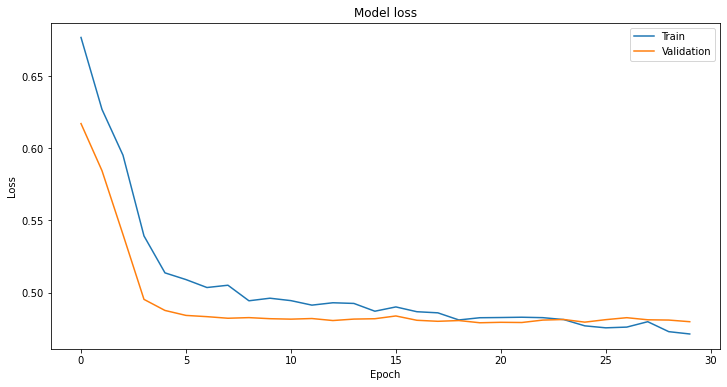

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
def create_model()